In [1]:
pip install -r requirements.txt



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!kaggle datasets download -d die9origephit/fifa-world-cup-2022-complete-dataset --unzip

  0%|                                               | 0.00/7.42k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 7.42k/7.42k [00:00<00:00, 1.97MB/s]


In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import bokeh
from bokeh.plotting import figure, gridplot, show
from bokeh.io import output_notebook
from bokeh.models import LabelSet, ColumnDataSource,FactorRange,HoverTool, Legend
from bokeh.transform import factor_cmap,dodge
from bokeh.palettes import Spectral11,HighContrast3

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from bokeh.plotting import figure, output_file, save
from IPython.display import IFrame
from IPython.core.display import display, HTML
import tempfile


def bokeh_deepnote_show(plot):
    tmp_output_filename = tempfile.NamedTemporaryFile(suffix='.html').name
    output_file(tmp_output_filename)
    save(plot)

    f = open(tmp_output_filename, "r")
    display(HTML(f.read()))

/tmp/ipykernel_177/2106465036.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [175]:
qatar_origin_df = pd.read_csv('/work/Fifa_world_cup_matches.csv')

qatar_origin_df.tail(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,14,9,2,1,1,1,0,1,0,2,6,5,4,3,6,6,8,3,17,15,6,2,4,7,2,2,10,13,661,401,127,84,312,136,222,181,8,7,147,136,108,87,13,14,10,8,1,3,0,0,10,14,1,2,508,369,453,310,22,13,5,6,5,2,5,2,14,11,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,10,12,0,3,3,0,0,0,1,0,7,3,2,7,7,6,3,6,8,18,9,6,7,7,3,4,2,8,349,643,89,136,122,291,138,216,7,3,147,182,91,129,17,9,7,1,2,2,0,0,15,8,1,0,408,624,344,551,8,20,2,4,4,8,2,4,6,16,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,14,13,0,2,2,0,0,0,0,0,2,1,8,6,12,8,2,5,9,10,6,4,3,6,2,6,6,19,330,702,82,136,99,314,149,252,8,15,126,141,85,95,12,18,8,11,0,1,0,0,11,11,4,3,358,583,307,518,5,22,2,1,1,8,2,3,13,15,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,14,7,1,2,2,1,0,0,2,0,4,2,8,5,7,5,7,2,20,13,8,1,3,3,2,7,7,16,519,609,117,127,198,202,204,280,15,10,164,150,114,97,23,14,12,8,0,2,0,0,13,11,2,2,491,494,430,428,21,20,3,5,7,12,6,3,13,15,0,0,7,14,0,0,75,72,288,277
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,21,10,3,3,3,3,0,0,1,1,9,5,9,3,10,7,11,3,13,15,6,7,8,5,9,4,9,12,607,507,146,105,257,207,204,195,43,10,223,163,151,99,38,14,23,9,4,3,0,0,26,19,4,4,648,516,544,419,20,24,4,3,6,5,6,5,22,28,1,2,11,21,0,0,87,104,280,409


In [6]:
print(qatar_origin_df.shape)
print(qatar_origin_df.info())

(64, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                 

In [181]:
qatar_origin_df['possession team1'] = qatar_origin_df['possession team1'].str.rstrip('%').astype('float') / 100.0
qatar_origin_df['possession team2'] = qatar_origin_df['possession team2'].str.rstrip('%').astype('float') / 100.0
qatar_origin_df['category'] = qatar_origin_df['category'].str.replace('Group.*', 'Group', regex=True)



In [165]:
columnas= qatar_origin_df.columns
columnas


Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [9]:
filter1 = []
filter2 = []

for columna in columnas[2:]:

    if 'team1' in columna:
        filter1.append(columna)

    elif 'team2' in columna:
        filter2.append(columna)
    else:
        
        pass



In [10]:
team1_df = (qatar_origin_df.drop(columns= filter2))
team2_df = qatar_origin_df.drop(columns= filter1)


names = [elemento.replace(' team1', '').replace('1', '') for elemento in team1_df.columns]
team1_df = team1_df.drop(columns= ['team2'])
team2_df = team2_df.drop(columns= ['team1'])
names.pop(1)
team1_df.columns= names
team2_df.columns= names


team1_df_against = (qatar_origin_df.drop(columns= filter1))
team2_df_agains = qatar_origin_df.drop(columns= filter2)

team1_df_against = team1_df_against.drop(columns= ['team2'])
team2_df_agains = team2_df_agains.drop(columns= ['team1'])

team1_df_against.columns= names
team2_df_agains.columns= names



#print(team1_df.shape, team2_df.shape, team1_df.columns, team2_df.columns)
team1_df_against

,team,possession,possession in contest,number of goals,date,hour,category,total attempts,conceded,goal inside the penalty area,goal outside the penalty area,assists,on target attempts,off target attempts,attempts inside the penalty area,attempts outside the penalty area,left channel,left inside channel,central channel,right inside channel,right channel,total offers to receive,inbehind offers to receive,inbetween offers to receive,infront offers to receive,receptions between midfield and defensive lines,attempted line breaks,completed line breaksteam,attempted defensive line breaks,completed defensive line breaksteam,yellow cards,red cards,fouls against,offsides,passes,passes completed,crosses,crosses completed,switches of play completed,corners,free kicks,penalties scored,goal preventions,own goals,forced turnovers,defensive pressures applied
0,QATAR,0.50,8%,2,20 NOV 2022,17 : 00,Group,6,0,2,0,1,3,3,4,2,8,7,6,4,6,532,127,187,218,8,155,99,13,7,2,0,15,4,480,409,14,4,9,3,17,1,5,0,72,279
1,ENGLAND,0.19,9%,2,21 NOV 2022,14 : 00,Group,8,6,2,0,1,3,4,6,2,3,0,3,1,0,212,53,86,73,4,101,45,7,4,2,0,14,2,224,154,8,1,3,0,10,1,13,0,72,416
2,SENEGAL,0.45,11%,2,21 NOV 2022,17 : 00,Group,9,0,2,0,1,3,5,5,4,11,2,2,7,20,506,117,191,198,14,162,96,22,10,1,0,13,1,438,374,25,8,6,7,14,0,15,0,73,251
3,UNITED STATES,0.39,10%,1,21 NOV 2022,20 : 00,Group,7,1,1,0,0,3,3,5,2,7,2,5,2,7,436,100,172,164,9,174,103,17,8,2,0,10,1,409,321,15,6,8,3,15,1,7,0,72,292
4,ARGENTINA,0.24,12%,2,22 NOV 2022,11 : 00,Group,3,1,2,0,1,2,0,3,0,3,2,3,3,8,268,69,131,68,9,137,68,15,7,6,0,21,1,267,190,9,2,7,2,16,0,14,0,80,361
5,DENMARK,0.33,12%,0,22 NOV 2022,14 : 00,Group,11,0,0,0,0,1,7,6,5,9,2,2,3,6,477,89,204,184,7,174,85,17,6,1,0,10,1,387,302,13,3,1,9,10,0,11,0,73,287
6,MEXICO,0.31,15%,0,22 NOV 2022,17 : 00,Group,8,0,0,0,0,1,4,7,1,8,6,6,4,13,296,72,101,123,3,150,82,12,2,1,0,16,0,322,241,10,2,1,5,16,0,15,0,70,290
7,FRANCE,0.35,9%,1,22 NOV 2022,20 : 00,Group,4,4,1,0,1,1,3,2,2,11,2,5,1,9,521,95,208,218,7,133,84,15,7,3,0,11,0,466,399,9,2,5,1,5,0,22,0,56,316
8,MOROCCO,0.57,12%,0,23 NOV 2022,11 : 00,Group,6,0,0,0,0,2,2,4,2,12,3,6,5,7,626,99,197,330,9,169,116,18,9,0,0,11,1,667,592,19,4,7,5,17,0,8,0,58,217
9,GERMANY,0.22,13%,2,23 NOV 2022,14 : 00,Group,10,1,2,0,1,3,6,10,0,5,0,3,3,11,346,102,146,98,10,113,70,17,11,0,0,14,4,261,207,16,3,2,6,10,0,26,0,87,487


In [11]:
qatar_teams= pd.concat([team1_df,team2_df], axis= 0)

qatar_teams_against= pd.concat([team1_df_against,team2_df_agains], axis= 0)



In [39]:
def goals(df):

    qatar_teams_goals = df.groupby('team').agg({'number of goals': ['sum', lambda x: round(x.mean(), 1)], 
                                                            'goal inside the penalty area': 'sum',
                                                            'total attempts': ['sum','mean'],
                                                            'on target attempts': 'sum',
                                                            'off target attempts': 'sum',
                                                            'attempts inside the penalty area': 'sum',
                                                            'penalties scored' : 'sum'})
    #qatar_teams_grouped['% goal inside the penalty area'] = (qatar_teams_grouped['goal inside the penalty area']/ qatar_teams_grouped['number of goals']['sum'] ) * 100

    qatar_teams_goals = qatar_teams_goals.reset_index()
    qatar_teams_goals.columns
    qatar_teams_goals['%goals inside']= round(((qatar_teams_goals['goal inside the penalty area']['sum'] - qatar_teams_goals['penalties scored']['sum'])/ qatar_teams_goals['number of goals']['sum'])*100,2)
    qatar_teams_goals['%goals of penalties']= round((qatar_teams_goals['penalties scored']['sum'] / qatar_teams_goals['number of goals']['sum'])*100,2)
    qatar_teams_goals['%goals outside']= 100-qatar_teams_goals['%goals inside']-qatar_teams_goals['%goals of penalties']
    qatar_teams_goals['Situacion per goal'] = round((qatar_teams_goals['total attempts']['sum'] / qatar_teams_goals['number of goals']['sum']),2)
    qatar_teams_goals['% attempts inside area'] = round((qatar_teams_goals['attempts inside the penalty area']['sum'] / qatar_teams_goals['total attempts']['sum'])*100,2)
    qatar_teams_goals['% attempts outside area'] = 100-qatar_teams_goals['% attempts inside area']
    team_counts = df['team'].value_counts().reset_index()


    qatar_teams_goals.columns = ['team','number of goals','number of goals avg','goal inside the penalty area',
                                    'total attempts', 'total attemps avg','on target attempts','off target attempts','attempts inside the penalty area',
                                    'penalties scored','%goals inside','%goals of penalties','%goals outside','Situacion per goal',
                                    '% attempts inside area','% attempts outside area']

    return(qatar_teams_goals)

In [46]:
qatar_teams_goals = goals(qatar_teams)
qatar_teams_goals_against = goals(qatar_teams_against)
qatar_teams_goals_against

,team,number of goals,number of goals avg,goal inside the penalty area,total attempts,total attemps avg,on target attempts,off target attempts,attempts inside the penalty area,penalties scored,%goals inside,%goals of penalties,%goals outside,Situacion per goal,% attempts inside area,% attempts outside area
0,ARGENTINA,8,1.1,7,43,6.142857,15,18,25,2,62.50,25.00,1.250000e+01,5.38,58.14,41.86
1,AUSTRALIA,6,1.5,6,63,15.750000,19,28,49,0,100.00,0.00,0.000000e+00,10.50,77.78,22.22
2,BELGIUM,2,0.7,2,43,14.333333,12,23,29,0,100.00,0.00,0.000000e+00,21.50,67.44,32.56
3,BRAZIL,3,0.6,2,34,6.800000,10,13,19,0,66.67,0.00,3.333000e+01,11.33,55.88,44.12
4,CAMEROON,4,1.3,3,43,14.333333,15,23,31,0,75.00,0.00,2.500000e+01,10.75,72.09,27.91
5,CANADA,7,2.3,5,29,9.666667,15,10,19,0,71.43,0.00,2.857000e+01,4.14,65.52,34.48
6,COSTA RICA,11,3.7,11,63,21.000000,21,29,43,1,90.91,9.09,3.552714e-15,5.73,68.25,31.75
7,CROATIA,7,1.0,7,81,11.571429,32,25,46,1,85.71,14.29,7.105427e-15,11.57,56.79,43.21
8,DENMARK,3,1.0,3,40,13.333333,11,17,25,0,100.00,0.00,0.000000e+00,13.33,62.50,37.50
9,ECUADOR,3,1.0,2,22,7.333333,6,14,13,1,33.33,33.33,3.334000e+01,7.33,59.09,40.91


In [43]:
qatar_teams_goals_sort = qatar_teams_goals.sort_values(('number of goals'), ascending=False)
team_counts = qatar_teams['team'].value_counts().reset_index()
team_counts.columns = ['team', 'team_appearances']
qatar_teams_goals_sorted = pd.merge(qatar_teams_goals_sort, team_counts, on='team')



plot1 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals on the WC",
           toolbar_location=None, tools="")

plot1.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['number of goals'], width=0.9)


plot1.xgrid.grid_line_color = None
plot1.y_range.start = 0
plot1.xaxis.major_label_orientation = 1


plot2 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals avg on the WC",
           toolbar_location=None, tools="")

plot2.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['number of goals avg'], width=0.9)

plot2.xgrid.grid_line_color = None
plot2.y_range.start = 0
plot2.xaxis.major_label_orientation = 1


plot3 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Situacion per goal",
           toolbar_location=None, tools="")

plot3.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['Situacion per goal'], width=0.9)

plot3.xgrid.grid_line_color = None
plot3.y_range.start = 0
plot3.xaxis.major_label_orientation = 1

plot4 = figure(x_range=qatar_teams_goals_sorted['team'], height=350, title="Total of goals on the WC",
               toolbar_location=None, tools="hover")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals inside'], width=0.4,
           color=HighContrast3[0], legend_label="%goals inside")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals outside'], width=0.4,
           color=HighContrast3[1], legend_label="%goals outside")

plot4.vbar(x=qatar_teams_goals_sorted['team'], top=qatar_teams_goals_sorted['%goals of penalties'], width=0.4,
           color=HighContrast3[2], legend_label="%goals of penalties")

plot4.xaxis.major_label_orientation = 1
plot4.y_range.start = 0
plot4.x_range.range_padding = 0.1
plot4.xgrid.grid_line_color = None
plot4.axis.minor_tick_line_color = None
plot4.outline_line_color = None
plot4.legend.location = "top_left"
plot4.legend.orientation = "vertical"


grid = gridplot([[plot1, plot2],[plot3, plot4]])

bokeh_deepnote_show(grid)

In [135]:
def attacks(df):
    qatar_teams_attack= df.groupby('team').agg({'left channel': 'sum',
                                                    'left inside channel': 'sum',
                                                    'central channel': 'sum',
                                                    'right inside channel': 'sum',
                                                    'right channel': 'sum'})

    qatar_teams_attack['total'] = qatar_teams_attack.sum(axis=1)

    for columna in qatar_teams_attack.columns:
        qatar_teams_attack[columna] = round((qatar_teams_attack[columna]/ qatar_teams_attack['total'])*100,2) 
    
    qatar_teams_attack=qatar_teams_attack.reset_index()
    
    return(qatar_teams_attack)


In [139]:
qatar_teams_attacks_my = attacks(qatar_teams)
qatar_teams_attacks_rival = attacks(qatar_teams_against)
qatar_teams_attacks_my

,team,left channel,left inside channel,central channel,right inside channel,right channel,total
0,ARGENTINA,27.11,13.86,15.96,12.65,30.42,100.0
1,AUSTRALIA,31.71,6.50,10.57,12.20,39.02,100.0
2,BELGIUM,35.64,15.84,14.85,9.90,23.76,100.0
3,BRAZIL,33.45,13.99,13.99,11.60,26.96,100.0
4,CAMEROON,19.64,20.54,10.71,11.61,37.50,100.0
5,CANADA,35.34,10.53,9.77,11.28,33.08,100.0
6,COSTA RICA,50.00,12.50,17.50,5.00,15.00,100.0
7,CROATIA,38.11,12.38,10.75,8.79,29.97,100.0
8,DENMARK,34.97,8.59,8.59,9.82,38.04,100.0
9,ECUADOR,36.05,17.44,10.47,17.44,18.60,100.0


In [122]:
def passes(df):

    qatar_teams_passes = df.groupby('team').agg({'total offers to receive': 'sum',
                                                        'inbehind offers to receive': 'sum', 
                                                        'inbetween offers to receive': 'sum',
                                                        'infront offers to receive': 'sum',
                                                        'receptions between midfield and defensive lines': 'mean',
                                                        'attempted line breaks': ['mean','sum'], 
                                                        'completed line breaksteam': 'sum',
                                                        'attempted defensive line breaks': ['mean','sum'],
                                                        'completed defensive line breaksteam': 'sum', 
                                                        'passes': ['mean','sum'] ,
                                                        'passes completed': 'sum',
                                                        'switches of play completed': 'mean', 
                                                        'corners': 'mean',
                                                        'free kicks': 'mean'})



    qatar_teams_passes['passes completed'] = qatar_teams_passes['passes completed']['sum']/  qatar_teams_passes['passes']['sum'] *100
    qatar_teams_passes['completed line breaksteam'] = qatar_teams_passes['completed line breaksteam']['sum']/  qatar_teams_passes['attempted line breaks']['sum'] *100
    qatar_teams_passes['completed defensive line breaksteam'] = qatar_teams_passes['completed defensive line breaksteam']['sum']/  qatar_teams_passes['attempted defensive line breaks']['sum'] *100

    qatar_teams_passes = qatar_teams_passes.round(2)
    qatar_teams_passes.columns=['total offers to receive_sum',
                                    'inbehind offers to receive_sum',
                                    'inbetween offers to receive_sum',
                                    'infront offers to receive_sum',
                                    'receptions between midfield and defensive lines_mean',
                                    'attempted line breaks_mean',
                                    'attempted line breaks_sum',
                                    '% line breakssteam completed',
                                    'attempted defensive line breaks_mean',
                                    'attempted defensive line breaks_sum',
                                    '% defensive line breaksteam completed',
                                    'passes_mean',
                                    'passes_sum',
                                    '% passes completed',
                                    'switches of play completed_mean',
                                    'corners_mean',
                                    'free kicks_mean'
                                ]


    return(qatar_teams_passes.reset_index())

In [138]:
qatar_teams_passes_my = passes(qatar_teams)
qatar_teams_passes_rival = passes(qatar_teams_against)
qatar_teams_passes_my


,team,total offers to receive_sum,inbehind offers to receive_sum,inbetween offers to receive_sum,infront offers to receive_sum,receptions between midfield and defensive lines_mean,attempted line breaks_mean,attempted line breaks_sum,% line breakssteam completed,attempted defensive line breaks_mean,attempted defensive line breaks_sum,% defensive line breaksteam completed,passes_mean,passes_sum,% passes completed,switches of play completed_mean,corners_mean,free kicks_mean
0,ARGENTINA,4595,898,1697,2000,16.29,187.00,1309,69.82,24.14,169,56.21,625.00,4375,87.79,5.43,5.57,17.57
1,AUSTRALIA,1703,396,626,681,7.75,154.00,616,56.49,15.75,63,49.21,384.00,1536,78.52,4.00,2.00,12.00
2,BELGIUM,1931,382,660,889,8.00,167.00,501,67.27,17.33,52,44.23,593.00,1779,88.14,4.67,5.67,14.33
3,BRAZIL,3432,745,1317,1370,12.80,181.40,907,72.66,18.20,91,62.64,601.80,3009,89.60,5.60,7.40,17.00
4,CAMEROON,1377,300,541,536,9.67,166.33,499,54.71,18.00,54,42.59,386.33,1159,80.59,5.67,4.00,15.33
5,CANADA,1877,450,737,690,9.67,176.67,530,65.66,19.67,59,45.76,499.33,1498,85.98,5.33,4.00,14.00
6,COSTA RICA,1023,229,437,357,4.00,142.33,427,57.61,9.33,28,28.57,340.67,1022,79.26,4.00,0.33,15.00
7,CROATIA,4402,920,1777,1705,11.86,197.71,1384,68.93,19.00,133,52.63,610.29,4272,87.17,9.43,4.29,15.14
8,DENMARK,1936,469,803,664,16.00,201.33,604,72.85,21.67,65,67.69,593.67,1781,87.76,11.33,7.00,9.33
9,ECUADOR,1526,296,637,593,7.33,152.00,456,57.02,15.00,45,42.22,445.67,1337,82.80,4.00,3.67,15.67


In [19]:
qatar_teams_general =qatar_teams.groupby('team').agg({'possession': 'mean',
                                                        'assists':'mean', 
                                                        'fouls against': 'mean',
                                                        'offsides': 'mean',
                                                        'crosses': 'mean',
                                                        'crosses completed': 'mean', 
                                                        'corners': 'mean',
                                                        'free kicks': 'mean',
                                                        'own goals': 'mean',
                                                        'forced turnovers': 'mean',
                                                        'defensive pressures applied': 'mean',
                                                        'number of goals': 'mean',
                                                        'number of rivals goals': 'mean'}).reset_index()

qatar_teams_general = qatar_teams_general.round(2)
qatar_teams_general

,team,possession,assists,fouls against,offsides,crosses,crosses completed,corners,free kicks,own goals,forced turnovers,defensive pressures applied,number of goals
0,ARGENTINA,0.51,1.14,14.29,3.29,16.43,4.29,5.57,17.57,0.14,70.57,241.14,2.14
1,AUSTRALIA,0.31,0.75,13.00,0.25,14.50,2.50,2.00,12.00,0.00,76.75,345.75,1.00
2,BELGIUM,0.50,0.33,10.00,1.00,17.00,5.33,5.67,14.33,0.00,60.00,274.67,0.33
3,BRAZIL,0.50,1.20,12.60,1.60,23.20,4.80,7.40,17.00,0.00,72.20,295.40,1.60
4,CAMEROON,0.38,1.33,10.67,0.67,17.33,2.67,4.00,15.33,0.00,80.00,307.33,1.33
5,CANADA,0.47,0.33,11.00,2.67,18.00,5.00,4.00,14.00,0.00,61.67,286.67,0.67
6,COSTA RICA,0.28,0.33,8.00,4.33,7.33,1.00,0.33,15.00,0.00,73.67,419.00,1.00
7,CROATIA,0.48,1.14,12.86,1.57,23.29,5.14,4.29,15.14,0.00,78.29,301.86,1.14
8,DENMARK,0.53,0.33,9.33,1.67,25.67,6.33,7.00,9.33,0.00,70.33,223.00,0.33
9,ECUADOR,0.47,0.67,16.67,2.67,18.33,4.67,3.67,15.67,0.00,61.00,249.33,1.33


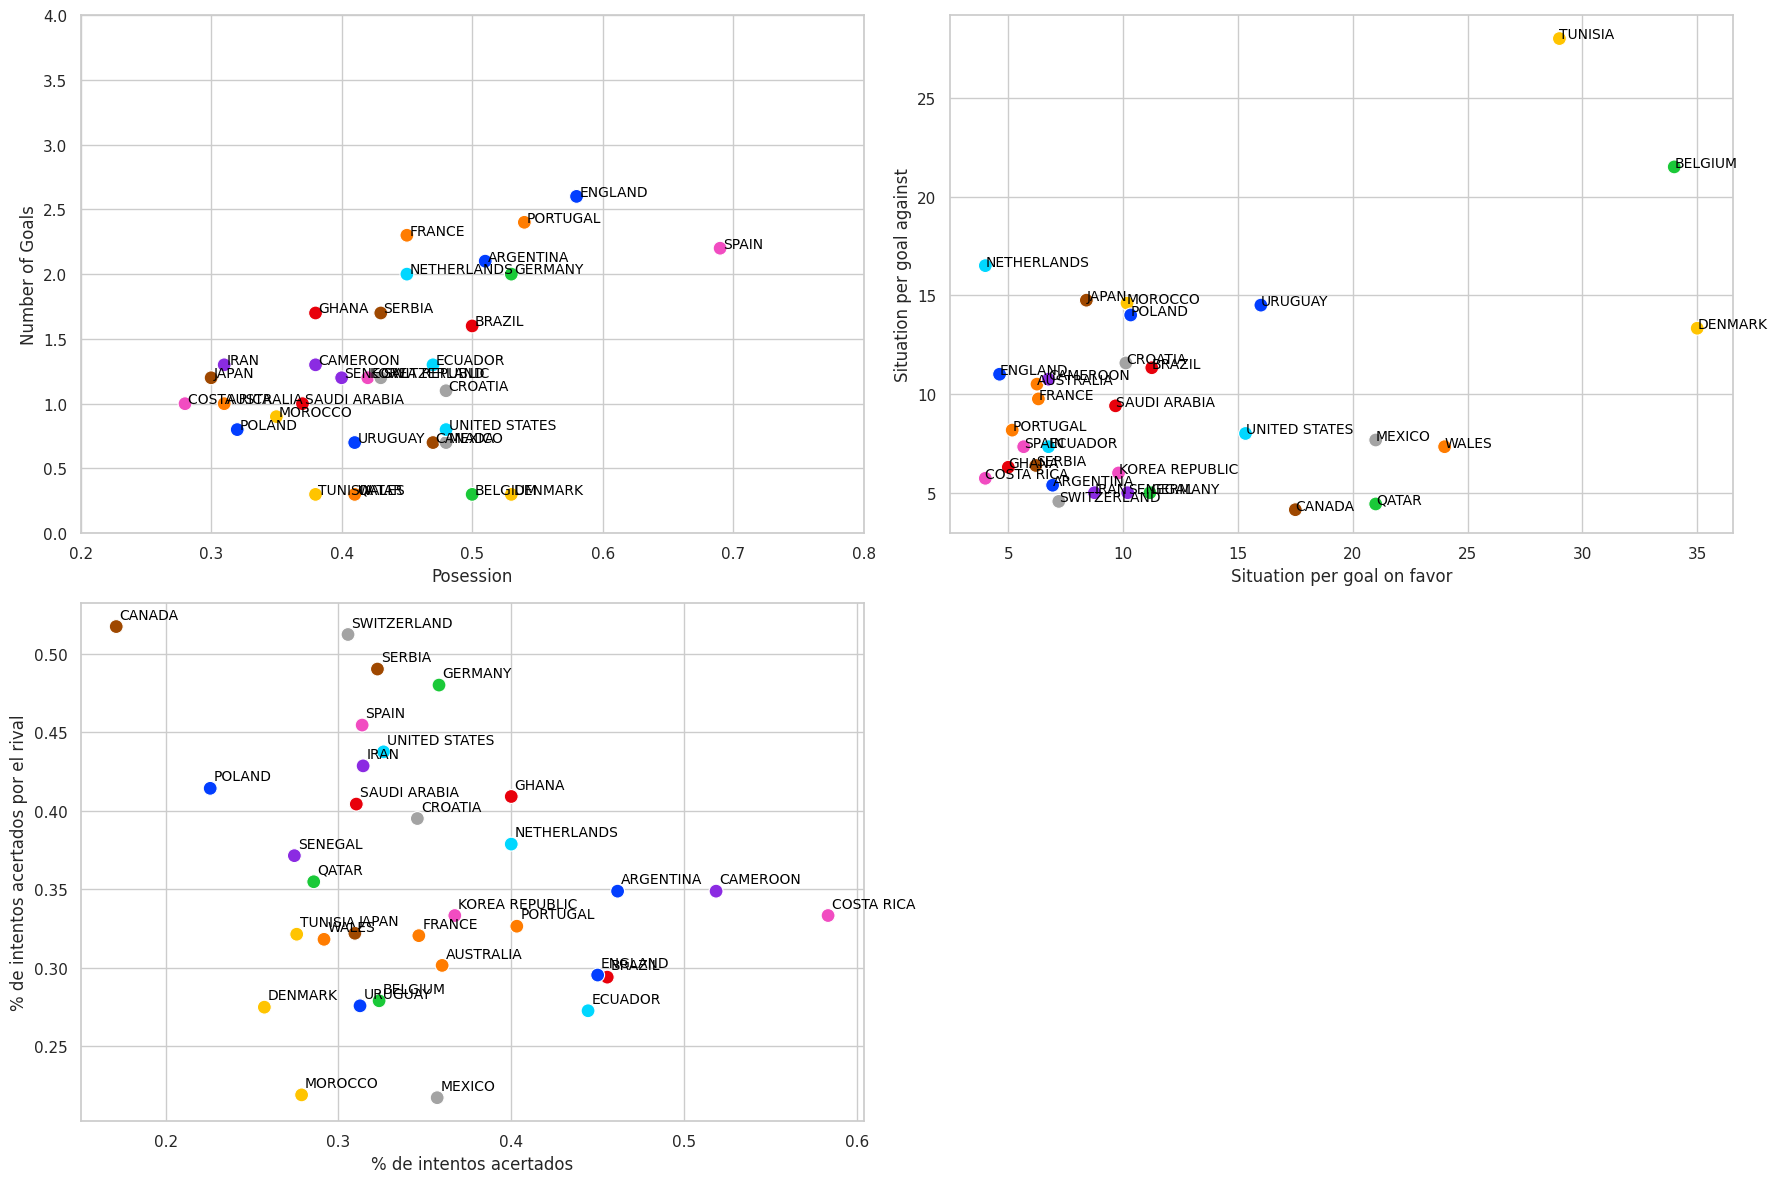

In [60]:
text_offset_x = 0.002
text_offset_y = 0.005


fig, axes = plt.subplots(2, 2, figsize=(18, 12))


sns.scatterplot(
    x=qatar_teams_general['possession'],
    y=qatar_teams_goals['number of goals avg'],
    hue=qatar_teams_general['team'],
    palette='bright',
    legend=False,
    s=100,
    ax=axes[0, 0]
)
axes[0, 0].set_xlabel('Posession')
axes[0, 0].set_ylabel('Number of Goals')
axes[0, 0].set_xlim(0.2, 0.8)
axes[0, 0].set_ylim(0, 4)


for line in range(0, qatar_teams_general.shape[0]):
    axes[0, 0].text(
        qatar_teams_general['possession'][line] + text_offset_x,
        qatar_teams_goals['number of goals avg'][line] + text_offset_y,
        qatar_teams_general['team'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        weight='normal'
    )


sns.scatterplot(
    x=qatar_teams_goals['Situacion per goal'],
    y=qatar_teams_goals_against['Situacion per goal'],
    hue=qatar_teams_goals['team'],
    palette='bright',
    legend=False,
    s=100,
    ax=axes[0, 1]
)
axes[0, 1].set_xlabel('Situation per goal on favor')
axes[0, 1].set_ylabel('Situation per goal against')


for line in range(0, qatar_teams_goals.shape[0]):
    axes[0, 1].text(
        qatar_teams_goals['Situacion per goal'][line] + text_offset_x,
        qatar_teams_goals_against['Situacion per goal'][line] + text_offset_y,
        qatar_teams_goals['team'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        weight='normal'
    )

x_on = qatar_teams_goals['on target attempts'] / qatar_teams_goals['total attempts']
y_against = qatar_teams_goals_against['on target attempts'] / qatar_teams_goals_against['total attempts']

sns.scatterplot(
    x=x_on,
    y=y_against,
    hue=qatar_teams_goals['team'],
    palette='bright',
    legend=False,
    s=100,
    ax=axes[1, 0]
)
axes[1, 0].set_xlabel('% de intentos acertados')
axes[1, 0].set_ylabel('% de intentos acertados por el rival')


for line in range(0, qatar_teams_goals.shape[0]):
    axes[1, 0].text(
        x_on[line] + text_offset_x,
        y_against[line] + text_offset_y,
        qatar_teams_goals['team'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        weight='normal'
    )


fig.delaxes(axes[1, 1])


plt.tight_layout()
plt.show()

Aqui podemos apreciar que existe una leve tendencia que cuanto mayor es la posesion del balon, mayor es el numero de goles. Por otro lado en nuestro segundo grafico buscamos estar lo mas cerca del eje X a cero, donde tendremos que crear pocas situaciones para hacer un gol mientras que el eje Y es contrario, por lo cual podemos ver selecciones como Argentina para la cual con pocas ocasiones creadas (aproximadamente 6) existe la chance de batir la porteria pero que necesita pocas chances para concretar goles pero la misma tiene gran parte del encuentro la pelota en posesión.  

También podemos apreciar que la misma seleccion Argentina tiene un porcentaje de acierto a la portería en cada tiro de l 45% aproximadamente y los rivales patean hacia su portería con relativa dificultad o tiros poco claros ya que el índice sugiere que 7 de cada 10 tiros no llegara a portería teniendo menor porcentaje de gol

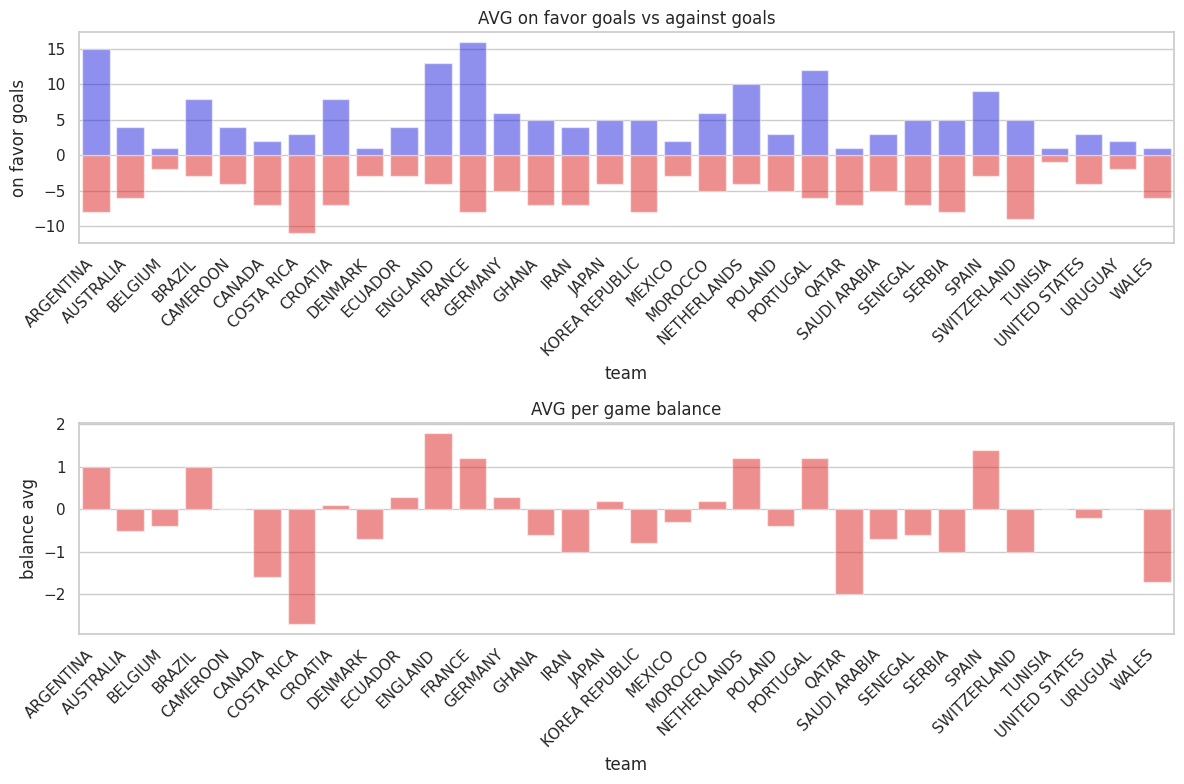

In [158]:
goals_vs_against = pd.merge(qatar_teams_goals_against, qatar_teams_goals, on='team', how='left')


goals_vs_against = goals_vs_against[['team','number of goals_x','number of goals_y', 'number of goals avg_x','number of goals avg_y']]

goals_vs_against.columns = ['team','against goals', 'on favor goals','avg against', 'avg on favor']
goals_vs_against['balance avg'] = -goals_vs_against['avg against']+goals_vs_against['avg on favor']
goals_vs_against['against goals'] = goals_vs_against['against goals']* (-1)


fig, axes = plt.subplots(2, 1, figsize=(12, 8))


sns.barplot(
    x='team',
    y='against goals',
    data=goals_vs_against,
    color='red',
    alpha=0.5,
    label='against goals',
    ax=axes[0]
)
sns.barplot(
    x='team',
    y='on favor goals',
    data=goals_vs_against,
    color='blue',
    alpha=0.5,
    label='on favor goals',
    ax=axes[0]
)

axes[0].set_xticklabels(goals_vs_against['team'], rotation=45, ha='right')
axes[0].set_title('AVG on favor goals vs against goals')


sns.barplot(
    x='team',
    y='balance avg',
    data=goals_vs_against,
    color='red',
    alpha=0.5,
    label='against goals',
    ax=axes[1]
)

axes[1].set_xticklabels(goals_vs_against['team'], rotation=45, ha='right')
axes[1].set_title('AVG per game balance')

plt.tight_layout()
plt.show()



In [179]:
dff_goles_partido = []

for match in range(len(qatar_origin_df)):

    dff_goles_partido.append(abs(qatar_origin_df['number of goals team1'][match]-qatar_origin_df['number of goals team2'][match]))

quantity_of_goals_per_match = []

for match in range(len(qatar_origin_df)):

    quantity_of_goals_per_match.append(qatar_origin_df['number of goals team1'][match]+qatar_origin_df['number of goals team2'][match])


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


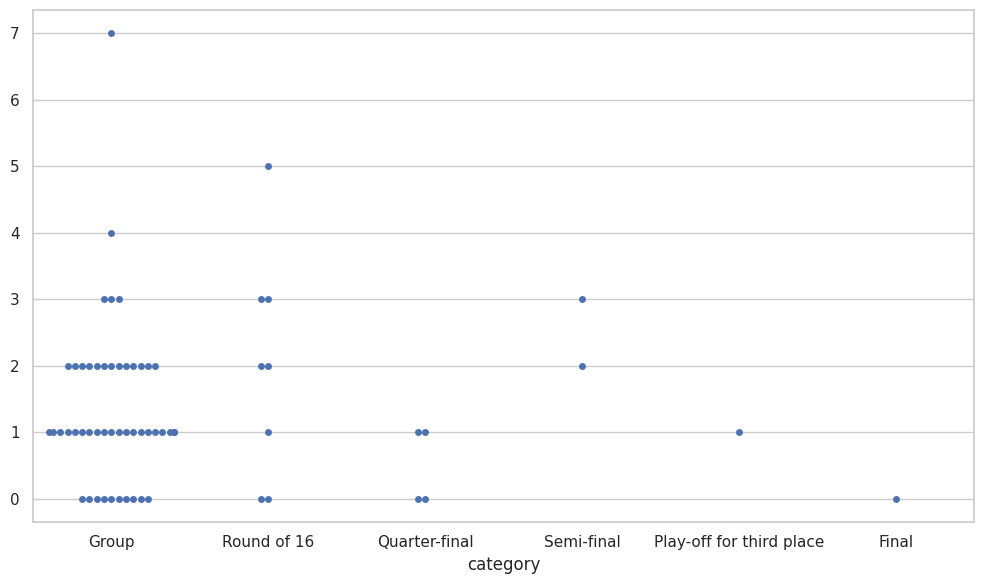

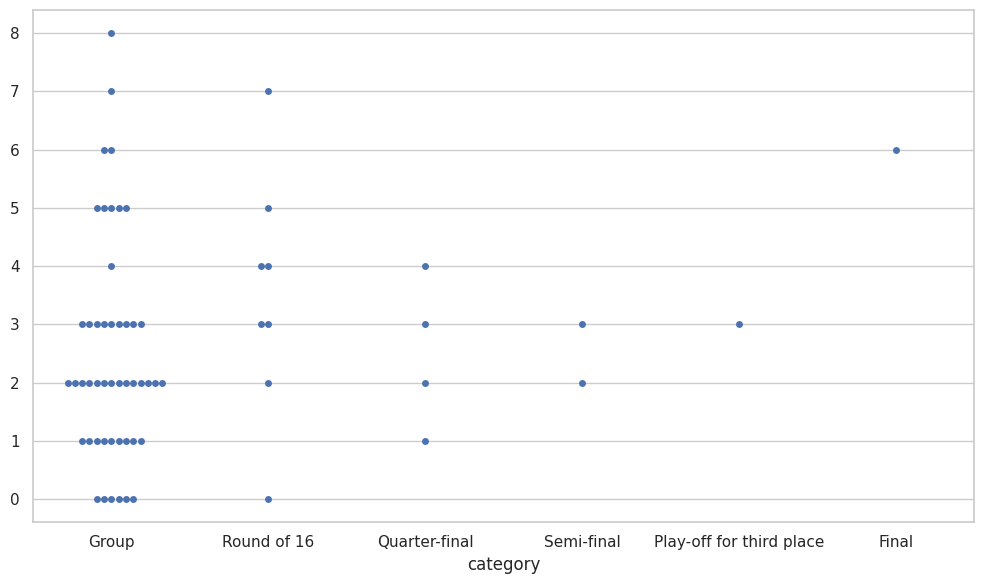

In [182]:
plt.figure(figsize=(10, 6))

sns.swarmplot(
    
    y=dff_goles_partido,
    x=qatar_origin_df['category'])

plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))

sns.swarmplot(
    
    y=quantity_of_goals_per_match,
    x=qatar_origin_df['category'])

plt.tight_layout()

plt.show()

A raíz de los gráficos anteriores podemos apreciar que ha sido Qatar 2022 un mundial de partidos sin grandes diferencias de goles donde no hubo equipos desde los goles ampliamente superiores, con ello queremos decir que en general se definieron en detalles y con resultados cerrados que en pocas ocasiones superaron los dos goles siendo mayormente victorias por un gol o empates en los 120 minutos. 

Cabe destacar que esto no signifique que no pudimos ver partidos atractivos, mas bien en un gran porcentaje pudimos ver partidos con mas de dos goles tanto en grupos como en fases definitorias lo cual nos muestra que durante el mundial Qatar 2022 la mayoría de los equipos tuvo predisposición al ataque.

# ¿Cómo se mueve y cómo pasaron la pelota los equipos?

In [89]:
qatar_teams_passes_my.columns

Index(['team', 'total offers to receive_sum', 'inbehind offers to receive_sum',
       'inbetween offers to receive_sum', 'infront offers to receive_sum',
       'receptions between midfield and defensive lines_mean',
       'attempted line breaks_mean', 'attempted line breaks_sum',
       '% line breakssteam completed', 'attempted defensive line breaks_mean',
       'attempted defensive line breaks_sum',
       '% defensive line breaksteam completed', 'passes_mean', 'passes_sum',
       '% passes completed', 'switches of play completed_mean', 'corners_mean',
       'free kicks_mean'],
      dtype='object')

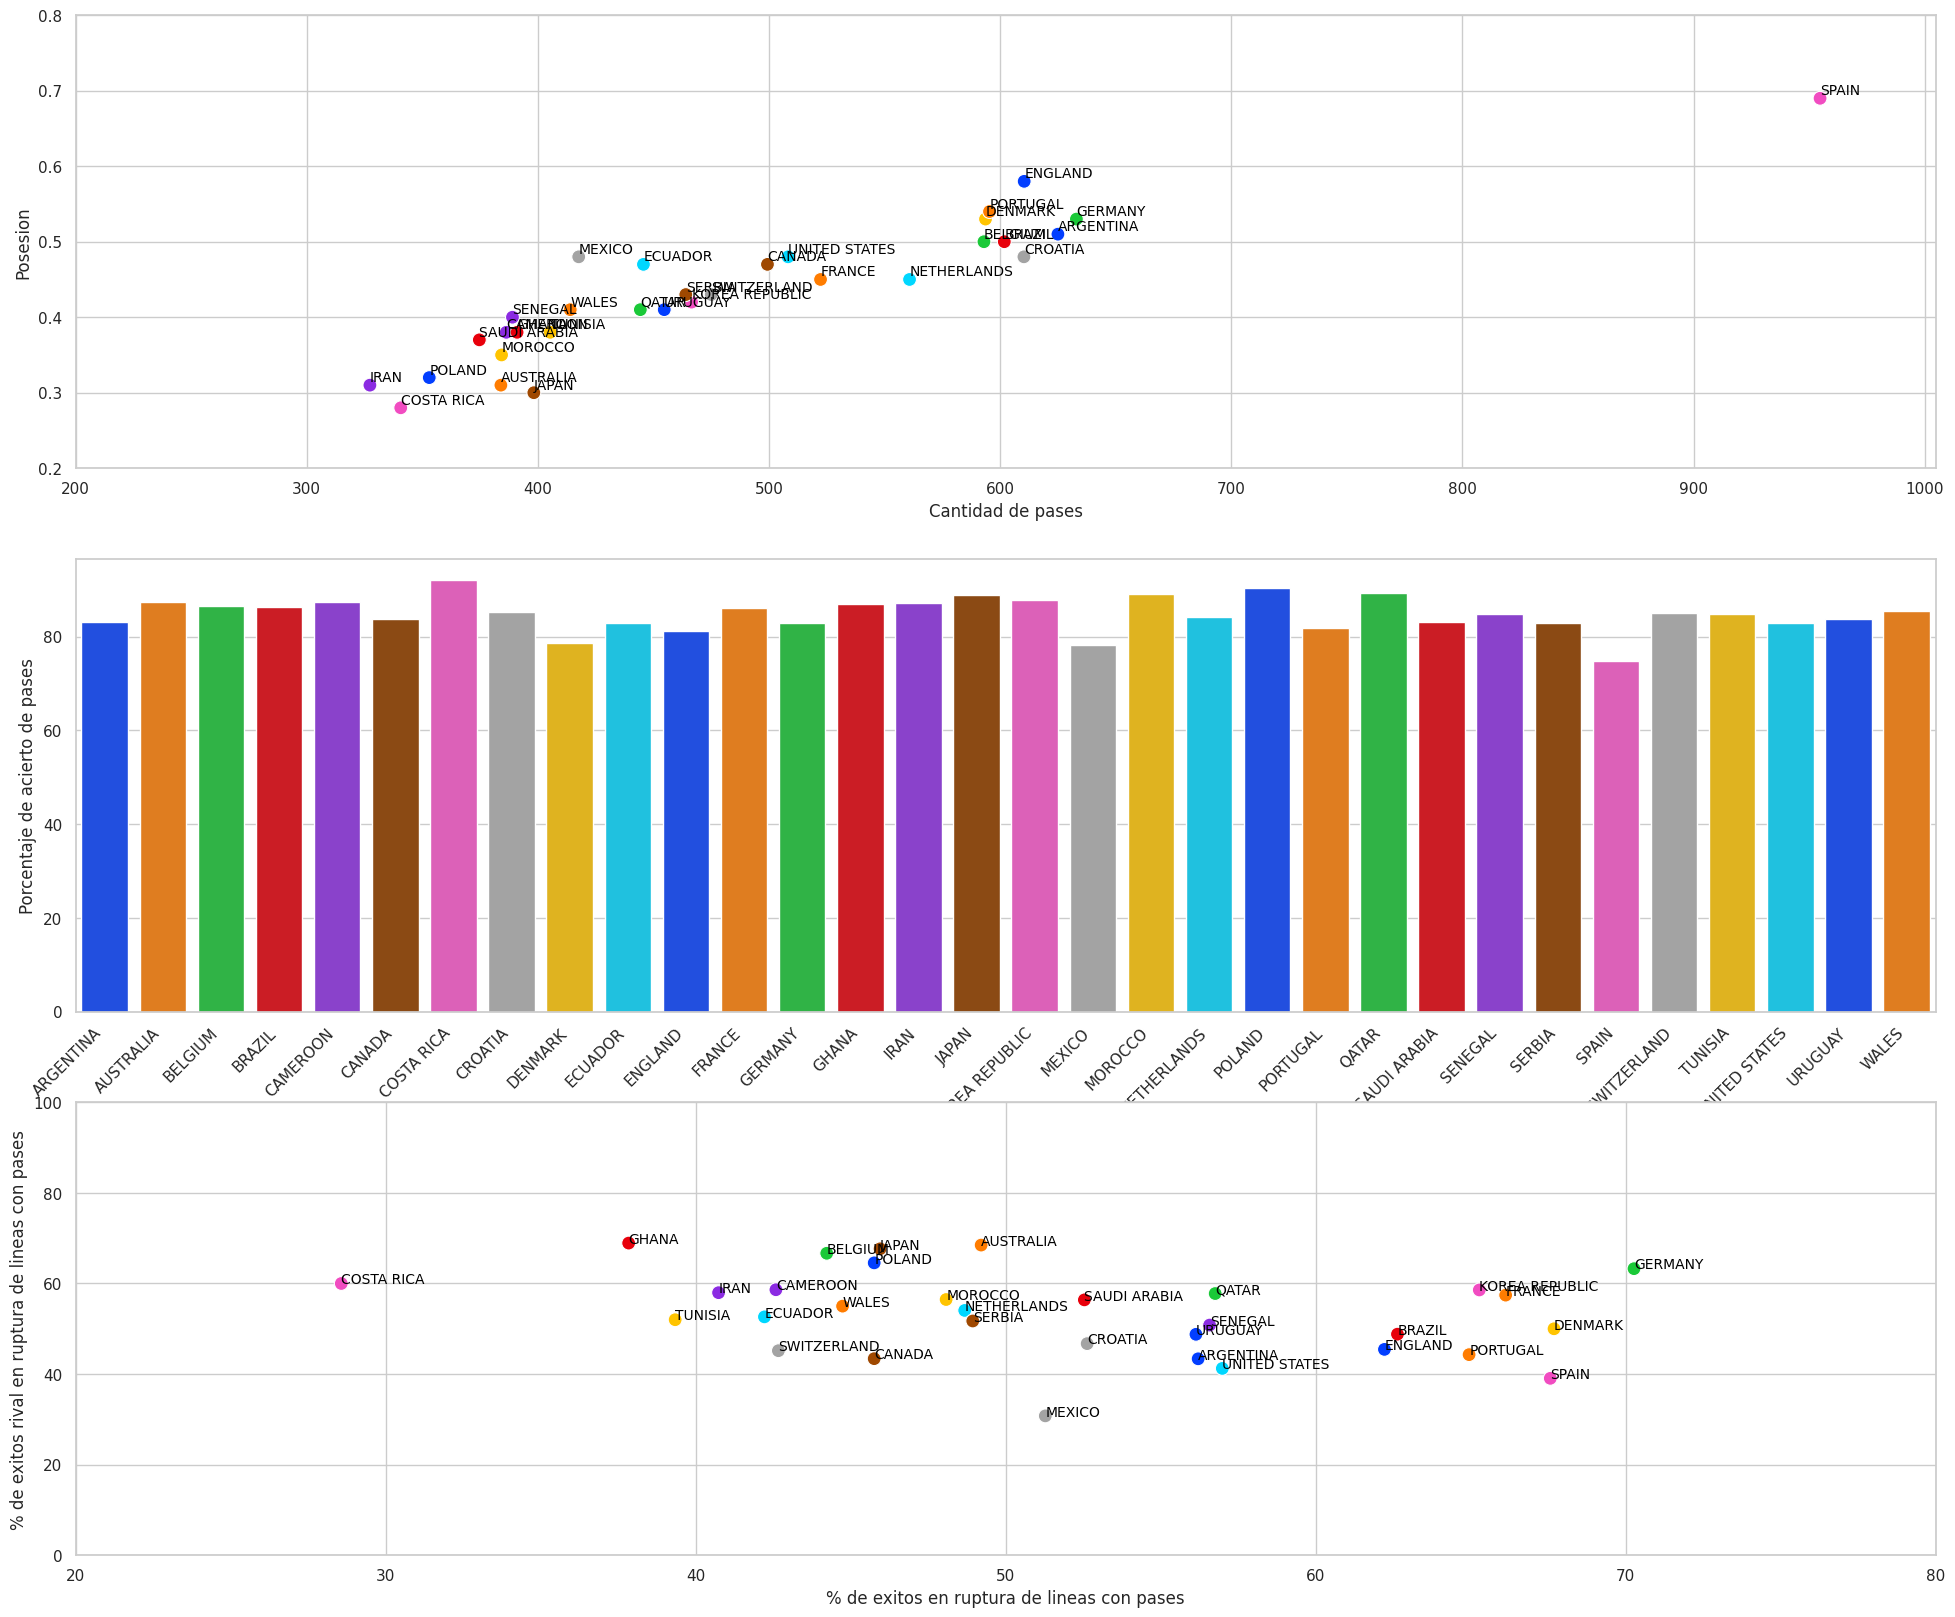

In [113]:
text_offset_x = 0.002
text_offset_y = 0.005

fig, axes = plt.subplots(3, 1, figsize=(24, 20))


sns.scatterplot(
    x=qatar_teams_passes_my['passes_mean'],
    y=qatar_teams_general['possession'],
    hue=qatar_teams_passes_my['team'],
    palette='bright',
    legend=False,
    s=100,
    ax=axes[0]
)
axes[0].set_xlabel('Cantidad de pases')
axes[0].set_ylabel('Posesion')
axes[0].set_xlim(200, max(qatar_teams_passes_my['passes_mean'])+50)
axes[0].set_ylim(0.2,0.8)

for line in range(0, qatar_teams_passes_my.shape[0]):
    axes[0].text(
        qatar_teams_passes_my['passes_mean'][line] + text_offset_x,
        qatar_teams_general['possession'][line] + text_offset_y,
        qatar_teams_passes_my['team'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        weight='normal'
    )


sns.barplot(
    x=qatar_teams_passes_my['team'],
    y=qatar_teams_passes_rival['% passes completed'],
    palette='bright',
    ax=axes[1]
)
axes[1].set_xlabel('Equipo')
axes[1].set_xticklabels(goals_vs_against['team'], rotation=45, ha='right')
axes[1].set_ylabel('Porcentaje de acierto de pases')


sns.scatterplot(
    x=qatar_teams_passes_my['% defensive line breaksteam completed'],
    y=qatar_teams_passes_rival['% defensive line breaksteam completed'],
    hue=qatar_teams_passes_my['team'],
    palette='bright',
    legend=False,
    s=100,
    ax=axes[2]
)
axes[2].set_xlabel('% de exitos en ruptura de lineas con pases')
axes[2].set_ylabel('% de exitos rival en ruptura de lineas con pases')
axes[2].set_xlim(20, 80)
axes[2].set_ylim(0, 100)

for line in range(0, qatar_teams_passes_my.shape[0]):
    axes[2].text(
        qatar_teams_passes_my['% defensive line breaksteam completed'][line] + text_offset_x,
        qatar_teams_passes_rival['% defensive line breaksteam completed'][line] + text_offset_y,
        qatar_teams_passes_my['team'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        weight='normal'
    )


plt.show()


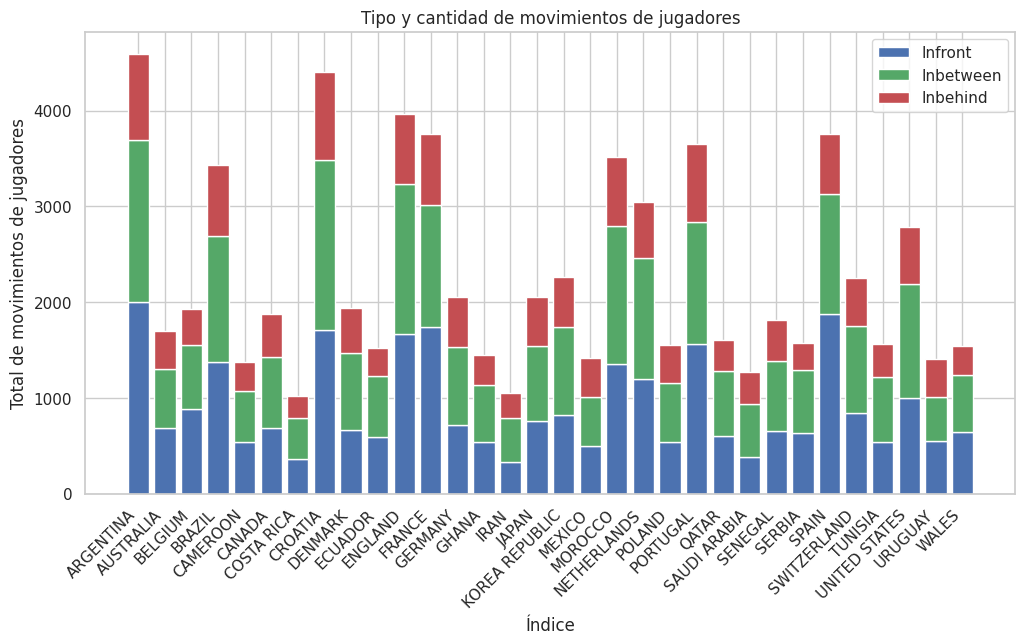

In [128]:



plt.figure(figsize=(12, 6))
plt.bar(qatar_teams_passes_my['team'], qatar_teams_passes_my['infront offers to receive_sum'], label='Infront', color='b')
plt.bar(qatar_teams_passes_my['team'], qatar_teams_passes_my['inbetween offers to receive_sum'], bottom=qatar_teams_passes_my['infront offers to receive_sum'], label='Inbetween', color='g')
plt.bar(qatar_teams_passes_my['team'], qatar_teams_passes_my['inbehind offers to receive_sum'], bottom=qatar_teams_passes_my['infront offers to receive_sum'] + qatar_teams_passes_my['inbetween offers to receive_sum'], label='Inbehind', color='r')

plt.xlabel('Índice')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de movimientos de jugadores')
plt.title('Tipo y cantidad de movimientos de jugadores')
plt.legend()
plt.show()

En este apartado podemos apreciar que España fue quien por gran diferencia mas pases por partido dio teniendo un gran porcentaje del tiempo de juego el balón en su poder, también podemos apreciar que fue  una de las selecciones que menor acierto tuvo.  Con el primer grafico podemos ver la velocidad de movimiento de pelota que tiene cada equipo en términos globales, ya que mientras menor posesión y mayor cantidad de pases mas frenético es su estilo de juego. Por ejemplo podemos remarcar que entre Francia y Países Bajos la posesión es casi similar pero la selección neerlandesa dio muchos mas pases mostrando mayor movilidad de la pelota pero sus pases de acuerdo al tercer gráfico no pudieron romper líneas en mas del 50% de las ocasiones mientras que Francia lograba quebrar lineas rivales en mas de 70% de las ocasiones con movimientos de sus jugadores por delante y entre medio de las lineas defensivas rivales.

# Por último ¿Por donde ataca cada selección?

In [ ]:
qatar_teams_attacks_my = attacks(qatar_teams)
qatar_teams_attacks_rival = attacks(qatar_teams_against)
qatar_teams_attacks_my

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8483ee88-cd2c-4814-9154-7d76d7408f8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>